# Fine-tuning a Keras model using Theano trained Neural Network & Introduction to Transfer Learning

FAIZAN SHAIKH , NOVEMBER 21, 2016
URL: https://www.analyticsvidhya.com/blog/2016/11/fine-tuning-a-keras-model-using-theano-trained-neural-network-introduction-to-transfer-learning/

In [3]:
# import all the required libraries
# %pylab inline 
# above never be used and is deprecated; ref: https://github.com/ipython/ipython/issues/5071/

import os, pylab
import numpy as np
import pandas as pd
from scipy.misc import imread, imshow
from sklearn.metrics import accuracy_score

import theano
import theano.tensor as T


Populating the interactive namespace from numpy and matplotlib


00001	#include <Python.h>
00002	#include "theano_mod_helper.h"
00003	#include "structmember.h"
00004	#include <sys/time.h>
00005	
00006	#if PY_VERSION_HEX >= 0x03000000
00007	#include "numpy/npy_3kcompat.h"
00008	#define PyCObject_AsVoidPtr  NpyCapsule_AsVoidPtr
00009	#define PyCObject_GetDesc  NpyCapsule_GetDesc
00010	#define PyCObject_Check NpyCapsule_Check
00011	#endif
00012	
00013	#ifndef Py_TYPE
00014	#define Py_TYPE(obj) obj->ob_type
00015	#endif
00016	
00017	/**
00018	
00019	TODO: 
00020	- Check max supported depth of recursion
00021	- CLazyLinker should add context information to errors caught during evaluation. Say what node we were on, add the traceback attached to the node.
00022	- Clear containers of fully-useed intermediate results if allow_gc is 1
00023	- Add timers for profiling
00024	- Add support for profiling space used.
00025	
00026	
00027	  */
00028	static double pytime(const struct timeval * tv)
00029	{
00030	  struct timeval t;
00031	  if (!tv)
00032	    {
00033	 

C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `_import_array':
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1460: undefined reference to `__imp_PyExc_ImportError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1466: undefined reference to `__imp_PyExc_AttributeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1471: undefined reference to `__imp_PyCapsule_Type'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1472: undefined reference to `__imp_PyExc_RuntimeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1487: undefined reference to `__imp_PyExc_RuntimeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1495: undefined reference to `__imp_PyExc_RuntimeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/_

01080	#define RETVAL m
01081	PyMODINIT_FUNC
01082	PyInit_lazylinker_ext(void) {
01083	#else
01084	#define RETVAL
01085	PyMODINIT_FUNC
01086	initlazylinker_ext(void) 
01087	{
01088	#endif
01089	    PyObject* m;
01090	
01091	    lazylinker_ext_CLazyLinkerType.tp_new = PyType_GenericNew;
01092	    if (PyType_Ready(&lazylinker_ext_CLazyLinkerType) < 0)
01093	        return RETVAL;
01094	#if defined(NPY_PY3K)
01095	    m = PyModule_Create(&moduledef);
01096	#else
01097	    m = Py_InitModule3("lazylinker_ext", lazylinker_ext_methods,
01098	                       "Example module that creates an extension type.");
01099	#endif
01100	    Py_INCREF(&lazylinker_ext_CLazyLinkerType);
01101	    PyModule_AddObject(m, "CLazyLinker", (PyObject *)&lazylinker_ext_CLazyLinkerType);
01102	
01103	    return RETVAL;
01104	}
01105	
Problem occurred during compilation with the command line below:
"C:\ProgramData\Anaconda3\Library\mingw-w64\bin\g++.exe" -shared -g -march=haswell -mmmx -mno-3dnow -msse -msse2 -

Exception: Compilation failed (return status=1): C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `_import_array':. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1460: undefined reference to `__imp_PyExc_ImportError'. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1466: undefined reference to `__imp_PyExc_AttributeError'. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1471: undefined reference to `__imp_PyCapsule_Type'. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1472: undefined reference to `__imp_PyExc_RuntimeError'. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1487: undefined reference to `__imp_PyExc_RuntimeError'. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1495: undefined reference to `__imp_PyExc_RuntimeError'. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1501: undefined reference to `__imp_PyExc_RuntimeError'. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1511: undefined reference to `__imp_PyExc_RuntimeError'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o:C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1523: more undefined references to `__imp_PyExc_RuntimeError' follow. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `NpyCapsule_Check':. C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/npy_3kcompat.h:456: undefined reference to `__imp_PyCapsule_Type'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `unpack_list_of_ssize_t':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:48: undefined reference to `__imp_PyExc_TypeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:58: undefined reference to `__imp_PyExc_IndexError'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `CLazyLinker_init':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:352: undefined reference to `__imp_PyExc_IndexError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:370: undefined reference to `__imp_PyExc_IndexError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:385: undefined reference to `__imp_PyExc_IndexError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:389: undefined reference to `__imp_PyExc_IndexError'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o:C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:393: more undefined references to `__imp_PyExc_IndexError' follow. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `CLazyLinker_init':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:405: undefined reference to `__imp_PyExc_TypeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:420: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:426: undefined reference to `__imp_PyExc_IndexError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:440: undefined reference to `__imp_PyExc_TypeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:444: undefined reference to `__imp__Py_NoneStruct'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `c_call':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:546: undefined reference to `__imp__Py_NoneStruct'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o:C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:546: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `lazy_rec_eval':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:618: undefined reference to `__imp_PyExc_IndexError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:641: undefined reference to `__imp_PyExc_TypeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:649: undefined reference to `__imp_PyExc_ValueError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:657: undefined reference to `__imp_PyExc_IndexError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:708: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:715: undefined reference to `__imp_PyExc_TypeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:721: undefined reference to `__imp_PyExc_TypeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:772: undefined reference to `__imp__Py_NoneStruct'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `CLazyLinker_call':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:814: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:826: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:840: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o:C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:850: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `CLazyLinker_call':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:894: undefined reference to `__imp_PyExc_AssertionError'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:938: undefined reference to `__imp__Py_NoneStruct'. C:\Users\hmchen\AppData\Local\Temp\ccnvIcef.o: In function `CLazyLinker_set_allow_gc':. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:973: undefined reference to `__imp_PyBool_Type'. C:/Users/hmchen/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.1-64/lazylinker_ext/mod.cpp:976: undefined reference to `__imp__Py_TrueStruct'. collect2.exe: error: ld returned 1 exit status. 

In [ ]:
# to stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

# set directory paths for safekeeping
root_dir = os.path.abspath('./')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

In [ ]:
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)

In [ ]:
# read dataset
train = pd.read_csv(os.path.join(data_dir, 'Train_HI6auGp', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test_fCbTej3.csv'))
sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission_lxuyBuB.csv'))


In [ ]:
# read image and display
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train_HI6auGp', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [ ]:
# img

In [ ]:
# store images as numpy arrays for easier data manipulation
temp = []
for image_path in train.filename:
    image_path = os.path.join(data_dir, 'Train_HI6auGp', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp .append(img)
train_x = np.stack(temp)

temp = []
for image_path in test.filename:
    image_path = os.path.join(data_dir, 'Train_HI6auGp', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
test_x = np.stack(temp)

In [ ]:
# taking a split size of 7:3 for train set vs validation set
split_size = int(train_x.shape[0]*0.7)
train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

# unknow feature --> check
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

In [ ]:
# define help functions
def dense_to_one_hot(labels_dense, num_classes=10):
    '''Convert class labels from sclaras to one-hot vectos'''
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

def preproc(unclean_batch_x):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch_x / unclean_batch_x.max()
    return temp_batch

def batch_creator(batch_size, dataset_x, dataset_y):
    """create batch with random samples"""
    batch_mask = rng.choice(dataset_x.shape[0], batch_size)
    batch_x = dataset_x[batch_mask]
    batch_y = dataset_y[batch_mask]

    batch_x = preproc(batch_x)
    batch_y = dense_to_one_hot(batch_y)
    return batch_x, batch_y

def to_theano_float(arr):
    """Convert numpy array to theano tensors"""
    return np.array(arr, dtype=theano.config.floatX)


In [ ]:
# define the neural network architecture with 3 layers: input, hidden, output
# number of neurons in each layer
input_num_units = 784
hidden_num_units = 500
output_num_units = 10

# initialize theano tensors
X = T.fmatrix()
y = T.fmatrix()

# set remaining paramters
epochs = 5
batch_size = 128


In [ ]:
# set weights and biases
weights_hidden = theano.shared(to_theano_float(rng.randn(*(input_num_units, hidden_num_units)) * 0.01))
weights_output = theano.shared(to_theano_float(rng.randn(*(hidden_num_units, output_num_units)) * 0.01))

bias_hidden = theano.shared(to_theano_float(rng.randn(hidden_num_units) * 0.01))
bias_output = theano.shared(to_theano_float(rng.randn(output_num_units) * 0.01))


In [ ]:
# create neural networks computational graph
hidden = T.nnet.relu(T.dot(X, weights_hidden) + bias_hidden)
output = T.nnet.softmax(T.dot(hidden, weights_output) + bias_output)
one_hot_to_dense = T.argmax(output, axis = 1)


In [ ]:
# define cost in neural network
cost = T.mean(T.nnet.categorical_crossentropy(output, y))


In [ ]:
# set the optimizer
params = [weights_hidden, weights_output, bias_hidden, bias_output]

def sgd(cost, params, lr=0.05):
    grads = T.grad(cost=cost, wrt=params); updates = []

    for p, g in zip(params, grads):
        updates.append([p, p - g *lr])
    return updates

updates = sgd(cost, params)


In [ ]:
# compile Theano function
train = theano.function(inputs=[X, y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=one_hot_to_dense, allow_input_downcast=True)


In [ ]:
# train the model
for epoch in range(epochs):
    avg_cost = 0
    total_batch = int(train_x.shape[0] / batch_size)
    for i in range(total_batch):
        batch_x, batch_y = batch_creator(batch_size, train_x, train_y)
    c = train(batch_x, batch_y)

avg_cost += c / total_batch

print("Training accuracy: {} \nValidation accuracy: {}".format(np.mean(train_y == predict(train_x)), 
        np.mean(val_y == predict(val_x))))

In [ ]:
# test model with visualization
pred = predict(test_x)

img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train_HI6auGp', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - 49000

print("Prediction ({}) is: {}".format(test_index, pred[test_index]))

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()


In [ ]:
# create a submission
sample_submission.filename = test.filename; sample_submission.label = pred
sample_submission.to_csv(os.path.join(sub_dir, 'sub04.csv'), index=False)

# Case study with Keras and Theano
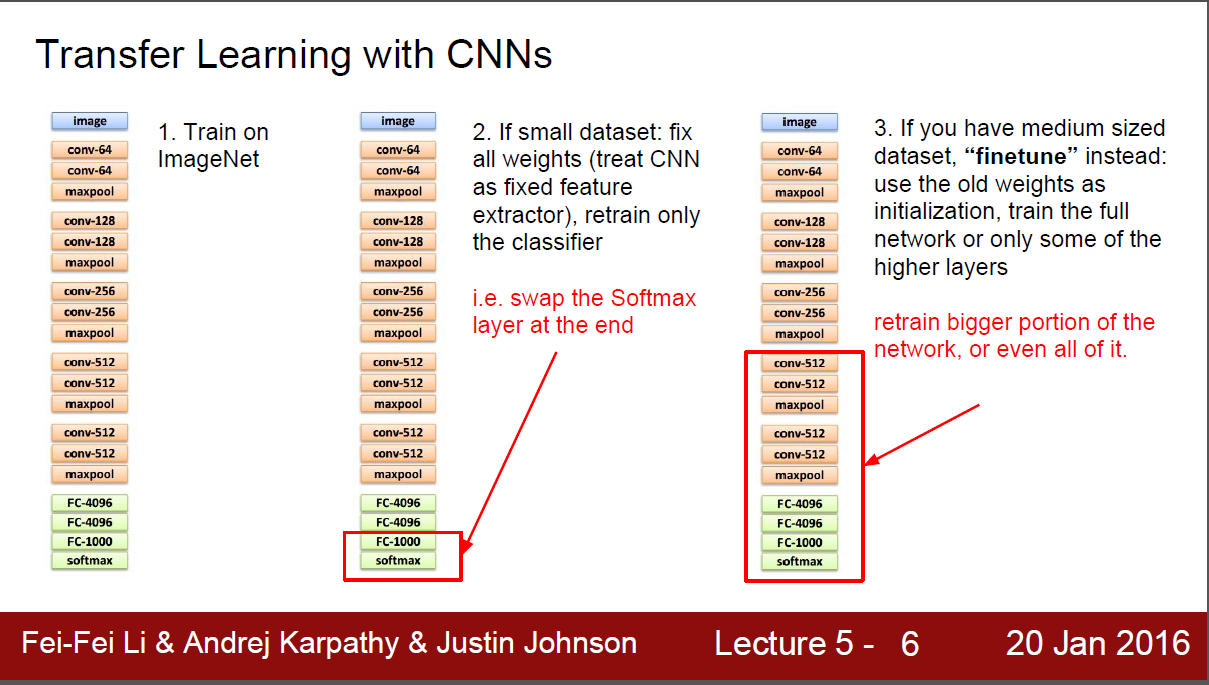

In [13]:
# import modules
import os, pylab
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import theano
import theano.tensor as T

from keras.models import Sequential
from keras.layers import Dense

C:\Users\hmchen\AppData\Local\Temp\ccGSqzaW.o: In function `_import_array':
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1460: undefined reference to `__imp_PyExc_ImportError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1466: undefined reference to `__imp_PyExc_AttributeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1471: undefined reference to `__imp_PyCapsule_Type'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1472: undefined reference to `__imp_PyExc_RuntimeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1487: undefined reference to `__imp_PyExc_RuntimeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1495: undefined reference to `__imp_PyExc_RuntimeError'
C:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include/numpy/_

00001	#include <Python.h>
00002	#include "theano_mod_helper.h"
00003	#include "structmember.h"
00004	#include <sys/time.h>
00005	
00006	#if PY_VERSION_HEX >= 0x03000000
00007	#include "numpy/npy_3kcompat.h"
00008	#define PyCObject_AsVoidPtr  NpyCapsule_AsVoidPtr
00009	#define PyCObject_GetDesc  NpyCapsule_GetDesc
00010	#define PyCObject_Check NpyCapsule_Check
00011	#endif
00012	
00013	#ifndef Py_TYPE
00014	#define Py_TYPE(obj) obj->ob_type
00015	#endif
00016	
00017	/**
00018	
00019	TODO: 
00020	- Check max supported depth of recursion
00021	- CLazyLinker should add context information to errors caught during evaluation. Say what node we were on, add the traceback attached to the node.
00022	- Clear containers of fully-useed intermediate results if allow_gc is 1
00023	- Add timers for profiling
00024	- Add support for profiling space used.
00025	
00026	
00027	  */
00028	static double pytime(const struct timeval * tv)
00029	{
00030	  struct timeval t;
00031	  if (!tv)
00032	    {
00033	 

AttributeError: module 'theano' has no attribute 'gof'

In [ ]:
# to stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [ ]:
# set paths
root_dir = os.path.abspath('./')
data_dir = os.path.join(root_dir, 'data', 'AV_data') # unable to find the dataset directory AV_data
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)

In [ ]:
# load data
train = pd.read_csv(data_dir, 'Train_HI6auGp', 'train.csv')
test = pd.read_csv(data_dir, 'Test_u94Q5KV.csv')

sample_submission = pd_read_csv(os.path.join(data_dir, 'Sample_Submission_NNTheaoKeras.csv'))

In [ ]:
# create train and test
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

In [ ]:
# create validation
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

In [ ]:
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

In [ ]:
# create helper functions
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = numpy.arange(num_labels) * num_classes
    labels_one_hot = numpy.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

def preproc(unclean_batch_x):
    """
    Convert values to range 0-1
    """
    temp_batch = unclean_batch_x / unclean_batch_x.max()
    
    return temp_batch

def batch_creator(batch_size, dataset_x, dataset_y):
    """
    Create batch with random samples
    """
    batch_mask = rng.choice(dataset_x.shape[0], batch_size)
    
    batch_x = dataset_x[batch_mask]
    batch_y = dataset_y[batch_mask]
    
    batch_x = preproc(batch_x)
    batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

def to_theano_float(arr):
    """Convert numpy array to theano tensors"""
    return np.asarray(arr, dtype=theano.config.floatX)

In [ ]:
# set variables

# number of neurons in each layer
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

# initialize theano tensors
X = T.fmatrix()
y = T.fmatrix()

# set remaining parameters
epochs = 5
batch_size = 128

In [ ]:
# set weights and biases
weights_hidden = theano.shared(to_theano_float(rng.randn(*(input_num_units, hidden_num_units)) * 0.01))
weights_output = theano.shared(to_theano_float(rng.randn(*(hidden_num_units, output_num_units)) * 0.01))

bias_hidden = theano.shared(to_theano_float(rng.randn(hidden_num_units) * 0.01))
bias_output = theano.shared(to_theano_float(rng.randn(output_num_units) * 0.01))

In [ ]:
# create NN architecture
hidden = T.nnet.relu(T.dot(X, weights_hidden) + bias_hidden)
output = T.nnet.softmax(T.dot(hidden, weights_output) + bias_output)
one_hot_to_dense = T.argmax(output, axis=1)

In [ ]:
# set cost
cost = T.mean(T.nnet.categorical_crossentropy(output, y))

In [ ]:
# define the first gradient descent function
params = [weights_hidden, weights_output, bias_hidden, bias_output]

def sgd1(cost, params, lr=0.1):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    
    for p, g in zip(params, grads):
        updates.append([p, p - g * lr])
        
    return updates

updates1 = sgd1(cost, params)

In [ ]:
# compile the Theano functions
train1 = theano.function(inputs=[X, y], outputs=cost, updates=updates1, allow_input_downcast=True)
train2 = theano.function(inputs=[X, y], outputs=cost, updates=updates2, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=one_hot_to_dense, allow_input_downcast=True)

In [ ]:
# start training
print('Training with first optimizer\n')

for epoch in range(epochs):
    avg_cost = 0
    total_batch = int(train_x.shape[0]/batch_size)
    for i in range(total_batch):
            batch_x, batch_y = batch_creator(batch_size, train_x, train_y)
            c = train1(batch_x, batch_y)
            
            avg_cost += c / total_batch
    
    print('Training accuracy: {}  Validation accuracy: {}'.format(np.mean(train_y == predict(train_x)), 
            np.mean(val_y == predict(val_x))))
    
print('\nTraining with second optimizer\n')

for epoch in range(epochs):
    avg_cost = 0
    total_batch = int(train_x.shape[0]/batch_size)
    for i in range(total_batch):
            batch_x, batch_y = batch_creator(batch_size, train_x, train_y)
            c = train2(batch_x, batch_y)
            
            avg_cost += c / total_batch
    
    print('Training accuracy: {}  Validation accuracy: {}'.format(np.mean(train_y == predict(train_x)), 
            np.mean(val_y == predict(val_x))))

In [ ]:
#  extract weights and biases from the trained model
w_h = weights_hidden.get_value()
w_o = weights_output.get_value()

b_h = bias_hidden.get_value()
b_o = bias_output.get_value()

In [ ]:
# create the Keras model
model = Sequential([
    Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),       
    Dense(output_dim=output_num_units, activation='softmax'),
]

In [ ]:
#  transfer weights from the trained model to the Keras model
model.layers[0].set_weights([w_h, b_h])
model.layers[1].set_weights([w_o, b_o])

In [ ]:
# fine tune the model. First will free the first layer of our network.
model.layers[0].trainable = False

In [ ]:
# Compile Keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

In [ ]:
# Retrain model on our data
model.fit(train_x, dense_to_one_hot(train_y), nb_epoch=epochs, batch_size=batch_size, 
          validation_data=(val_x, dense_to_one_hot(val_y)))

In [ ]:
# Get predictions and visualize
pred = model.predict_classes(test_x)

img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - 49000

print("Prediction is: {}".format(pred[test_index]))

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [ ]:
#  create our submission
sample_submission.filename = test.filename; sample_submission.label = pred 
sample_submission.to_csv(os.path.join(sub_dir, 'sub05.csv'), index=False)